# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
!find /data/landmark_images -maxdepth 4 -type d

/data/landmark_images
/data/landmark_images/train
/data/landmark_images/train/49.Temple_of_Olympian_Zeus
/data/landmark_images/train/01.Mount_Rainier_National_Park
/data/landmark_images/train/22.Moscow_Raceway
/data/landmark_images/train/43.Gullfoss_Falls
/data/landmark_images/train/16.Eiffel_Tower
/data/landmark_images/train/06.Niagara_Falls
/data/landmark_images/train/12.Kantanagar_Temple
/data/landmark_images/train/18.Delicate_Arch
/data/landmark_images/train/02.Ljubljana_Castle
/data/landmark_images/train/26.Pont_du_Gard
/data/landmark_images/train/45.Temple_of_Heaven
/data/landmark_images/train/07.Stonehenge
/data/landmark_images/train/15.Central_Park
/data/landmark_images/train/23.Externsteine
/data/landmark_images/train/33.Sydney_Opera_House
/data/landmark_images/train/24.Soreq_Cave
/data/landmark_images/train/38.Forth_Bridge
/data/landmark_images/train/46.Great_Wall_of_China
/data/landmark_images/train/20.Matterhorn
/data/landmark_images/train/08.Grand_Canyon
/data/landmark_ima

In [1]:
import numpy as np
import torch
from torch.utils import data
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch.nn as nn
import os

In [2]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


DS_DIR = "/data/landmark_images"
BATCH_SIZE = 2**6
IMG_MEAN = torch.tensor([0.46739, 0.47412, 0.46854])
IMG_STD = torch.tensor([0.03806, 0.03731, 0.03984])

IMG_MEAN = torch.tensor( [0.485, 0.456, 0.406])
IMG_STD = torch.tensor([0.229, 0.224, 0.225])

normalize = transforms.Normalize(mean=IMG_MEAN,
                             std=IMG_STD)

train_transforms = transforms.Compose([
        transforms.Resize(257),
        transforms.RandomCrop(256),
        transforms.RandomHorizontalFlip(0.25), 
        transforms.RandomVerticalFlip(0.25),
        transforms.ToTensor(),
       normalize
])

test_transforms = transforms.Compose([
        transforms.Resize(257),
        transforms.CenterCrop(256),
        transforms.ToTensor(),
        normalize
])



full_ds = ImageFolder(os.path.join(DS_DIR, 'train'), transform=train_transforms)
test_ds = ImageFolder(os.path.join(DS_DIR, 'test'), transform=test_transforms)


# Train-Val split
train_ratio = 0.8
train_split_idx = int(train_ratio * len(full_ds))
idxs = np.arange(len(full_ds))
np.random.shuffle(idxs)
train_idxs = idxs[:train_split_idx]
val_idxs = train_idxs = idxs[train_split_idx:]
train_sampler = data.sampler.SubsetRandomSampler(train_idxs)
val_sampler = data.sampler.SubsetRandomSampler(val_idxs)

#train_ds, val_ds = data.random_split(full_ds, [train_size, val_size]), not supported in v. 0.4.0 :( 



train_loader = data.DataLoader(full_ds, batch_size=BATCH_SIZE, sampler=train_sampler)
val_loader = data.DataLoader(full_ds, batch_size=BATCH_SIZE, sampler=val_sampler)
test_loader = data.DataLoader(test_ds, batch_size=1, shuffle=False)


loaders_scratch = {'train': train_loader, 'valid': val_loader, 'test': test_loader}


In [3]:
len(full_ds.classes)

50

In [5]:
ds_len = len(full_ds)
mean, std = 0,0
for i,y in full_ds:
    mean += i.mean(1).mean(1)
    std += i.std(1).std(1)
mean /= ds_len
std /= ds_len

print([round(n, 5) for n in mean.tolist()])
print([round(n, 5) for n in std.tolist()])

[-0.07483, 0.08519, 0.28382]
[0.16698, 0.16731, 0.17737]


**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 
1. First the image is resized to 257x257px, then cropped randomly to 256x256px. Hence size of the input tensor will  be 256x256px. This size is used to balance between performance and information retention. 
2. Yes, using random horizantal and vertical flips, then normalized the image using the mean and standard deviation of ImageNet dataset. 

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

In [118]:
def denormalize_img(x):
    x[0, :, :] = x[ 0, :, :] * IMG_STD[0] + IMG_MEAN[0]
    x[1, :, :] = x[ 1, :, :] * IMG_STD[1] + IMG_MEAN[1]
    x[2, :, :] = x[ 2, :, :] * IMG_STD[2] + IMG_MEAN[2]
    return x

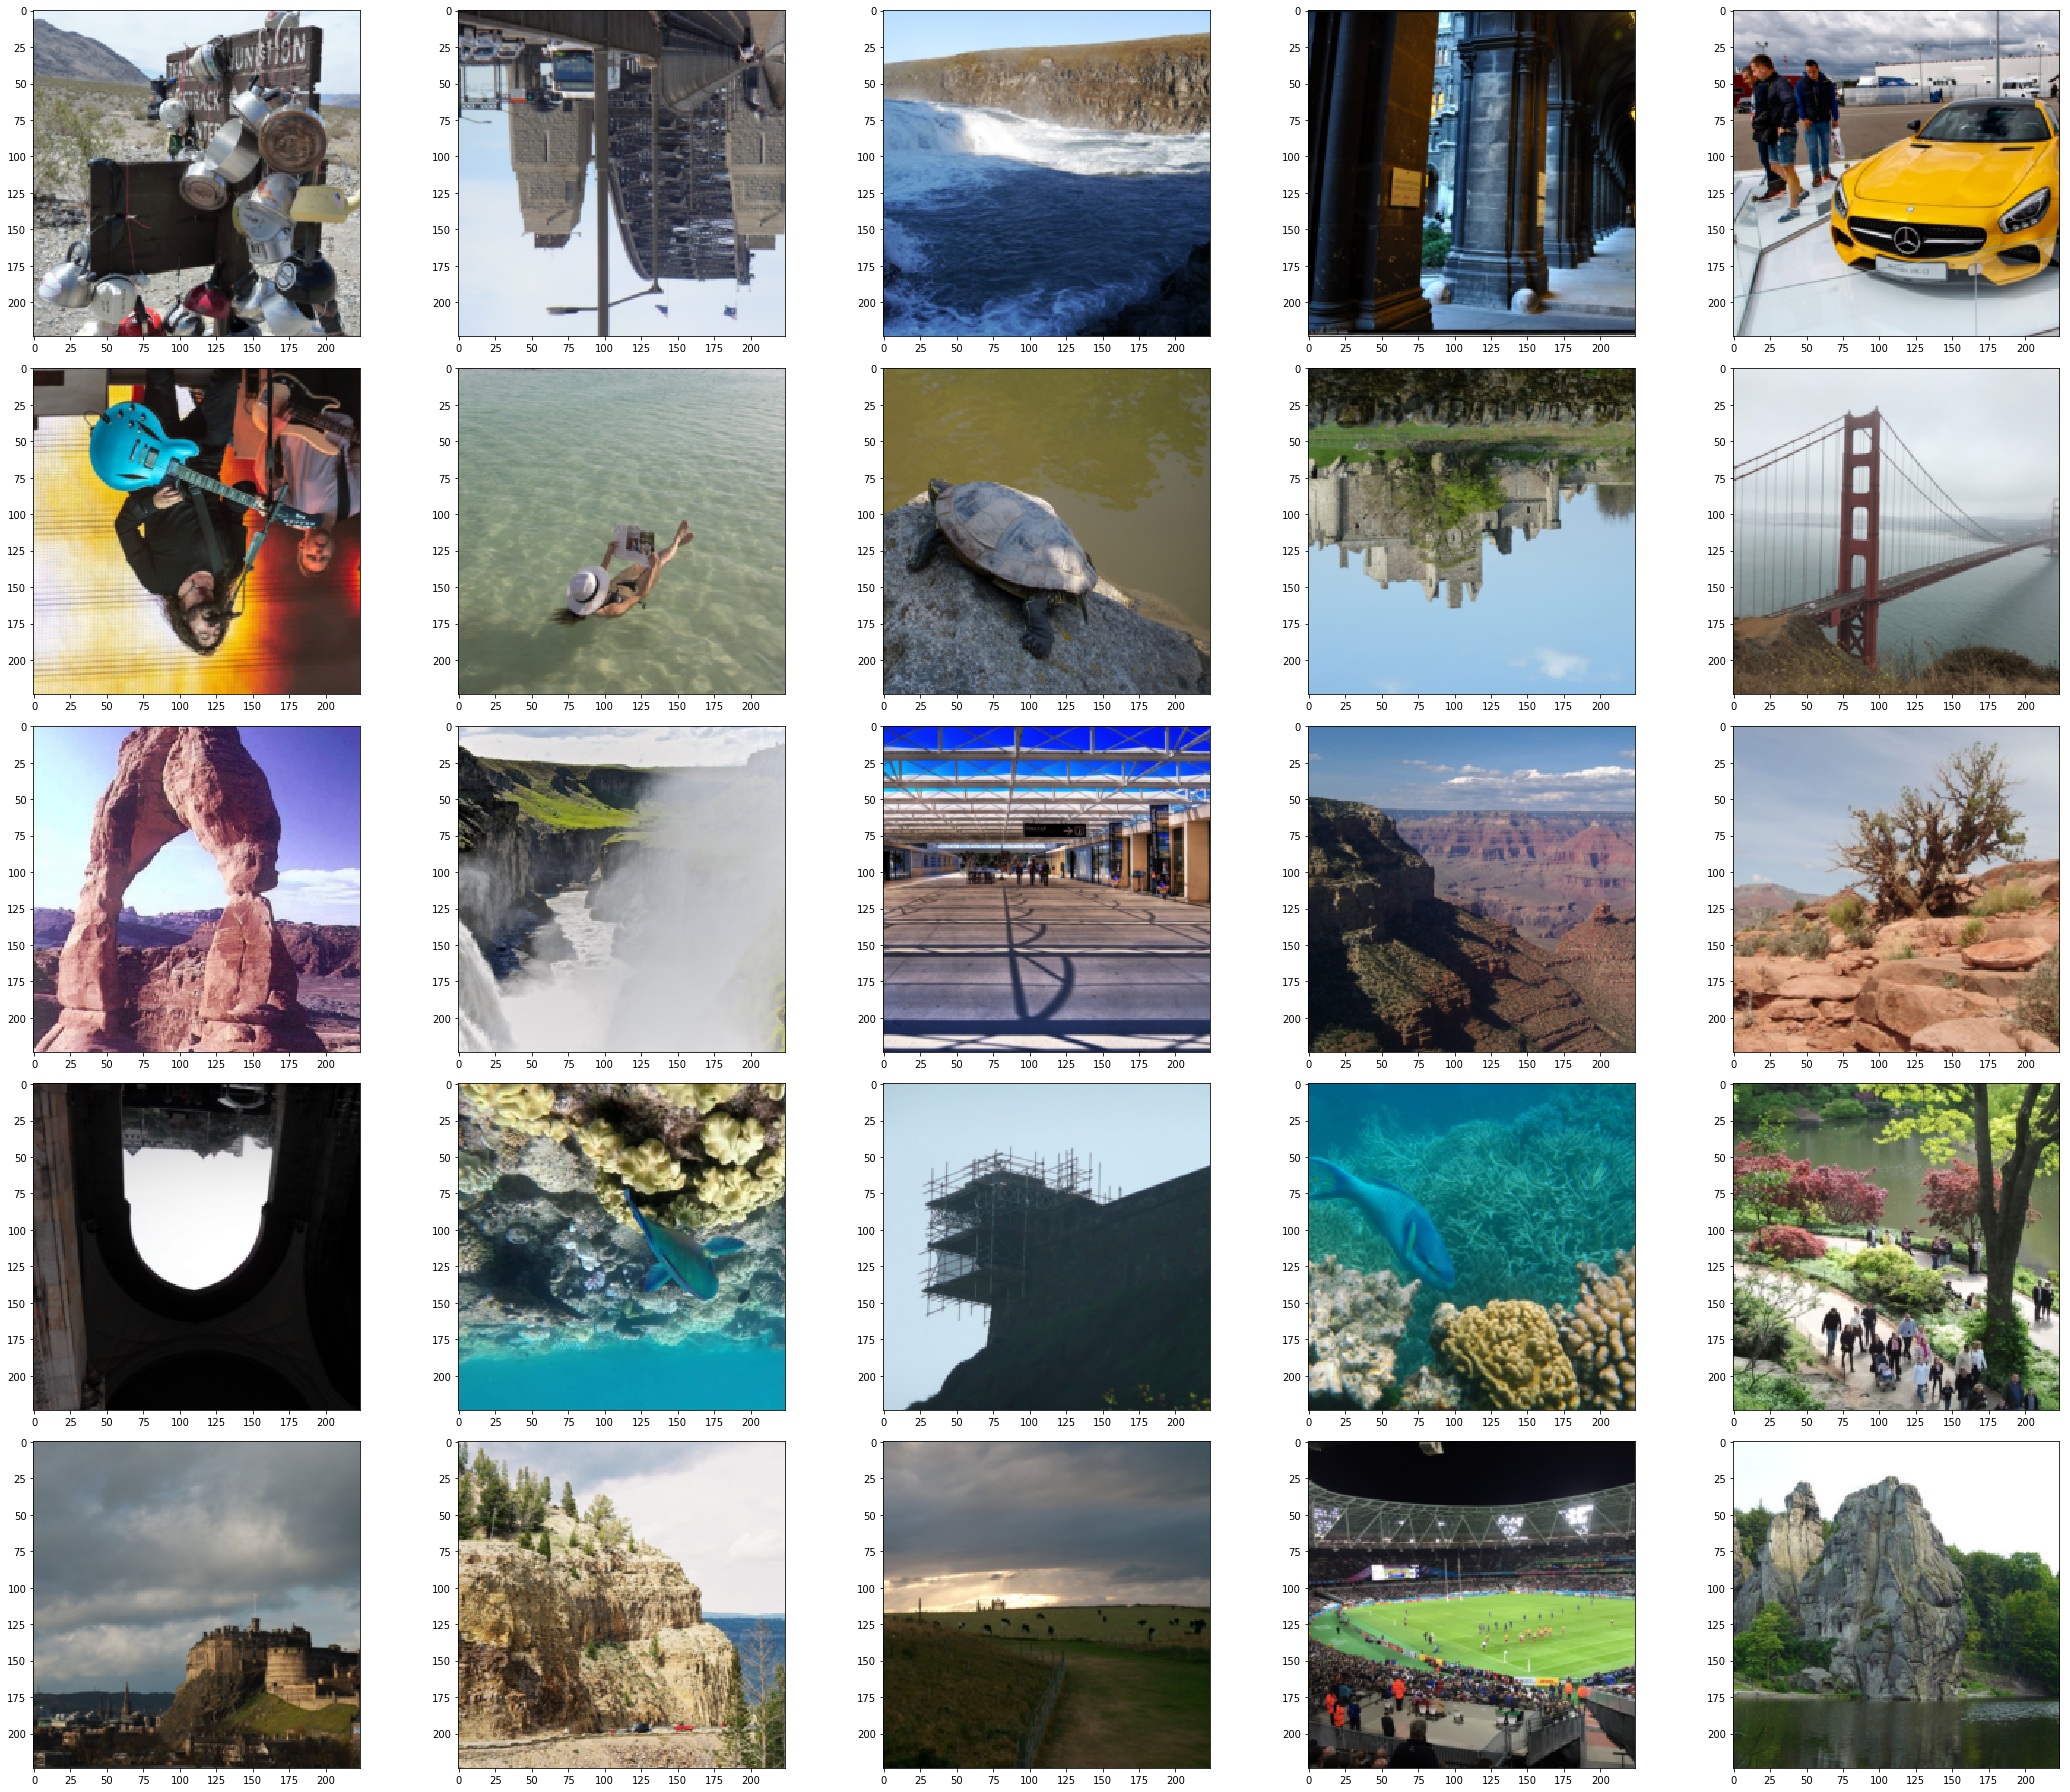

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader
fig, axs = plt.subplots(5, 5, figsize=(30, 25))

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)
temp_ds,y = next(iter(train_loader))
for i, a in enumerate(axs.flatten()):
    norm_img = temp_ds[i]
    img = denormalize_img(norm_img)
    img = img.permute(1, 2, 0) 
    a.imshow(img.numpy())
fig.tight_layout()

### Initialize use_cuda variable

In [120]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [121]:
## TODO: select loss functiondq
criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    return torch.optim.Adam(model.parameters(), lr=1e-3)
    
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

1. Conv; $[3x256x256]$ --> $[9x256x256]$ (3x3)
2. MaxPool; $[9x256x256]$ --> $[9x128x128]$ (2x2)
3. Conv; $[9x128x128]$ --> $[18x128x128]$ (3x3)
4. MaxPool;  $[18x128x128]$ --> $[18x64x64]$ (2x2)
5. Conv;  $[18x64x64]$ --> $[24x64x64]$ (3x3)
6. MaxPool;  $[24x64x64]$ --> $[24x32x32]$ (2x2)
7. Conv;  $[24x32x32]$ --> $[30x32x32]$ (3x3)
8. MaxPool;  $[30x32x32]$ --> $[30x16x16]$ (3x3)




In [122]:
import torch.nn as nn

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.stack =  nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        )
        
        self.fc = nn.Sequential(
            nn.Linear(8**2 * 256, 4096),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(4096, 50),
    
        )

        
        
    
    def forward(self, x):
        ## Define forward behavior
        x = self.stack(x)
        x = x.view(-1, 8**2 * 256)
        x = self.fc(x)
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  The network is designed to increase the depth while decreasing the feature size to extract patterns at each convolution the depth is increase then the resulting feature map is downsampled by half at each step by a max pool layer. 

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [123]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            out = model(data)
            
         
            
            optimizer.zero_grad()
            loss = criterion(out, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() / len(target)
            
            del data
            del target
            torch.cuda.empty_cache()
            

            
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 

            out = model(data)
            loss = criterion(out, target)
            valid_loss += loss.item() / len(target)
            del data
            del target
            torch.cuda.empty_cache()
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if (valid_loss < valid_loss_min):
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            print('Model saved!')

        
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [124]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(1e-3)
    
    

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 1.047958 	Validation Loss: 1.007702
Model saved!
Epoch: 2 	Training Loss: 0.999024 	Validation Loss: 0.972834
Model saved!
Epoch: 3 	Training Loss: 0.970043 	Validation Loss: 0.938452
Model saved!
Epoch: 4 	Training Loss: 0.936919 	Validation Loss: 0.899650
Model saved!
Epoch: 5 	Training Loss: 0.907857 	Validation Loss: 0.871230
Model saved!
Epoch: 6 	Training Loss: 0.871453 	Validation Loss: 0.834355
Model saved!
Epoch: 7 	Training Loss: 0.829171 	Validation Loss: 0.807255
Model saved!
Epoch: 8 	Training Loss: 0.800890 	Validation Loss: 0.757477
Model saved!
Epoch: 9 	Training Loss: 0.754382 	Validation Loss: 0.689659
Model saved!
Epoch: 10 	Training Loss: 0.704260 	Validation Loss: 0.668511
Model saved!
Epoch: 11 	Training Loss: 0.663864 	Validation Loss: 0.594732
Model saved!
Epoch: 12 	Training Loss: 0.624770 	Validation Loss: 0.592495
Model saved!
Epoch: 13 	Training Loss: 0.608685 	Validation Loss: 0.510933
Model saved!
Epoch: 14 	Training Loss: 0.529539

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [125]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 100

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 1.018429 	Validation Loss: 1.013732
Model saved!
Epoch: 2 	Training Loss: 1.013252 	Validation Loss: 1.008127
Model saved!
Epoch: 3 	Training Loss: 1.005664 	Validation Loss: 1.001615
Model saved!
Epoch: 4 	Training Loss: 0.998319 	Validation Loss: 0.989461
Model saved!
Epoch: 5 	Training Loss: 0.979662 	Validation Loss: 0.961926
Model saved!
Epoch: 6 	Training Loss: 0.965348 	Validation Loss: 0.945797
Model saved!
Epoch: 7 	Training Loss: 0.952115 	Validation Loss: 0.927244
Model saved!
Epoch: 8 	Training Loss: 0.932698 	Validation Loss: 0.900940
Model saved!
Epoch: 9 	Training Loss: 0.910192 	Validation Loss: 0.884556
Model saved!
Epoch: 10 	Training Loss: 0.886152 	Validation Loss: 0.864746
Model saved!
Epoch: 11 	Training Loss: 0.857656 	Validation Loss: 0.810265
Model saved!
Epoch: 12 	Training Loss: 0.826667 	Validation Loss: 0.792142
Model saved!
Epoch: 13 	Training Loss: 0.814742 	Validation Loss: 0.759152
Model saved!
Epoch: 14 	Training Loss: 0.780262

KeyboardInterrupt: 

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [126]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        
        del data
        del target
        torch.cuda.empty_cache()
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.071806


Test Accuracy: 20% (258/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [25]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes



train_transforms = transforms.Compose([
        transforms.Resize(226),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(0.25), 
        transforms.RandomVerticalFlip(0.25),
        transforms.ToTensor(),
       normalize
])

test_transforms = transforms.Compose([
        transforms.Resize(226),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
])



full_ds = ImageFolder(os.path.join(DS_DIR, 'train'), transform=train_transforms)
test_ds = ImageFolder(os.path.join(DS_DIR, 'test'), transform=test_transforms)
BATCH_SIZE = 64

# Train-Val split
train_ratio = 0.8
train_split_idx = int(train_ratio * len(full_ds))
idxs = np.arange(len(full_ds))
np.random.shuffle(idxs)
train_idxs = idxs[:train_split_idx]
val_idxs = train_idxs = idxs[train_split_idx:]
train_sampler = data.sampler.SubsetRandomSampler(train_idxs)
val_sampler = data.sampler.SubsetRandomSampler(val_idxs)

#train_ds, val_ds = data.random_split(full_ds, [train_size, val_size]), not supported in v. 0.4.0 :( 



train_loader = data.DataLoader(full_ds, batch_size=BATCH_SIZE, sampler=train_sampler)
val_loader = data.DataLoader(full_ds, batch_size=BATCH_SIZE, sampler=val_sampler)
test_loader = data.DataLoader(test_ds, batch_size=1, shuffle=False)


loaders_transfer = {'train': train_loader, 'valid': val_loader, 'test': test_loader}



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [54]:
## TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()


def get_optimizer_transfer(model):
    return torch.optim.Adam(model.parameters(), lr=5e-4)

    
    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [58]:
## TODO: Specify model architecture
from torchvision import models

model_transfer = models.resnet18(pretrained=True)
model_transfer.fc = nn.Linear(model_transfer.fc.in_features, 50)


#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

In [59]:
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  I selected ResNet18 becaues it migtates the the vanishing gradient issue. Then I only changed the size of the fully connected layer to match the number of classes. I used the weights of the trained ResNet18 but I didn't freeze the network; since my dataset is somehow large and solves a differnet problem.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [60]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'
num_epochs=100
model_scratch = train(num_epochs, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), 
                      criterion_transfer, use_cuda, 'model_transfer.pt')


#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.771908 	Validation Loss: 0.472820
Model saved!
Epoch: 2 	Training Loss: 0.375204 	Validation Loss: 0.244893
Model saved!
Epoch: 3 	Training Loss: 0.219410 	Validation Loss: 0.172310
Model saved!
Epoch: 4 	Training Loss: 0.136575 	Validation Loss: 0.108012
Model saved!
Epoch: 5 	Training Loss: 0.081939 	Validation Loss: 0.062324
Model saved!
Epoch: 6 	Training Loss: 0.063440 	Validation Loss: 0.041196
Model saved!
Epoch: 7 	Training Loss: 0.046096 	Validation Loss: 0.045853
Epoch: 8 	Training Loss: 0.035984 	Validation Loss: 0.027327
Model saved!


KeyboardInterrupt: 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [61]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.380953


Test Accuracy: 65% (819/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [89]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    model_transfer.eval()
    img = Image.open(img_path)
    img = test_transforms(img).unsqueeze(0).cuda()
    out = model_transfer(img)
    del img
    idxs = torch.topk(out, k)[1][0].tolist()
    classes = list(full_ds.class_to_idx.keys())
    return [''.join(s for s in classes[i].replace('_', ' ') if s.isalpha() or s == ' ') for i in idxs]

    


# test on a sample image
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['Golden Gate Bridge',
 'Forth Bridge',
 'Brooklyn Bridge',
 'London Olympic Stadium',
 'Sydney Opera House']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

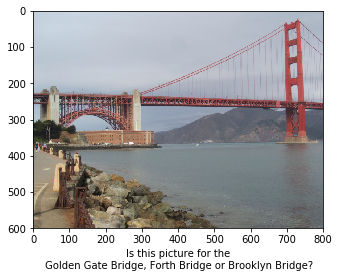

In [101]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    text = ', '.join(predicted_landmarks[:-1]) + ' or ' + predicted_landmarks[-1]
    
    ## TODO: display image and display landmark predictions
    fig, ax = plt.subplots()
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_xlabel(f'Is this picture for the\n {text}?')
    
    

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

In [105]:
!wget https://www.nyc.gov/html/dot/images/infrastructure/brooklyn-bridge.jpg

--2021-07-15 19:23:32--  https://www.nyc.gov/html/dot/images/infrastructure/brooklyn-bridge.jpg
Resolving www.nyc.gov (www.nyc.gov)... 23.214.67.23, 2600:1407:3c00:791::1500, 2600:1407:3c00:783::1500
Connecting to www.nyc.gov (www.nyc.gov)|23.214.67.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 362293 (354K) [image/jpeg]
Saving to: ‘brooklyn-bridge.jpg’

brooklyn-bridge.jpg 100%[===================>] 353.80K  --.-KB/s    in 0.1s    

2021-07-15 19:23:33 (3.16 MB/s) - ‘brooklyn-bridge.jpg’ saved [362293/362293]



In [108]:
!wget https://www.detail-online.com/fileadmin/uploads/olympic_Nachtteaser1_Olympic_Stadium_CGI_01.jpg

--2021-07-15 19:25:43--  https://www.detail-online.com/fileadmin/uploads/olympic_Nachtteaser1_Olympic_Stadium_CGI_01.jpg
Resolving www.detail-online.com (www.detail-online.com)... 188.40.58.46
Connecting to www.detail-online.com (www.detail-online.com)|188.40.58.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 493326 (482K) [image/jpeg]
Saving to: ‘olympic_Nachtteaser1_Olympic_Stadium_CGI_01.jpg’

olympic_Nachtteaser 100%[===================>] 481.76K  1.07MB/s    in 0.4s    

2021-07-15 19:25:44 (1.07 MB/s) - ‘olympic_Nachtteaser1_Olympic_Stadium_CGI_01.jpg’ saved [493326/493326]



__Answer:__ (Three possible points for improvement)

1. Filter; keep relevant images only, and discard images unrelated to the scene like animals. 
2. Increase the trainning images volume. 
3. Add an extra class for unknown locations; if the user provided a picture of a place that doesn't exist. 

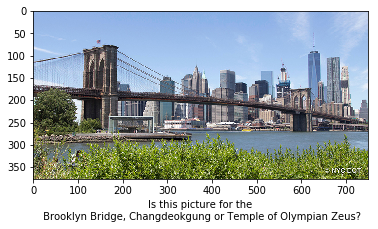

In [107]:
suggest_locations('./brooklyn-bridge.jpg')

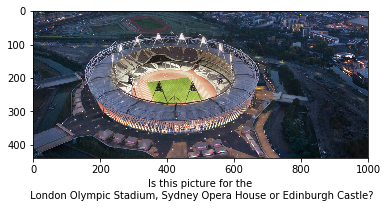

In [109]:
suggest_locations('./olympic_Nachtteaser1_Olympic_Stadium_CGI_01.jpg')

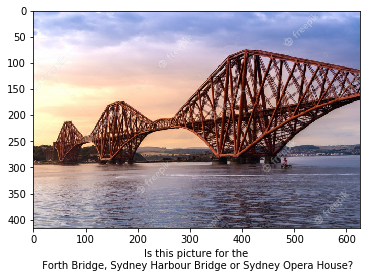

In [111]:
suggest_locations('./forth-bridge-edinburgh_63253-7067.jpg')

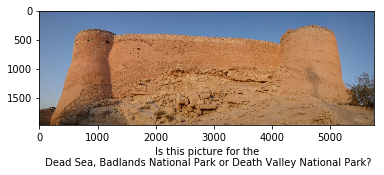

In [114]:
suggest_locations('./PANO_20160923_170835.jpg')